# Machine Learning - Supervised algorithm (Kmeans)
Maestría Ciencias de Información y las Comunicaciones - Materia: Big Data.

Por: David Alonso Rueda Rodríguez - 20181395007 (daruedar@correo.udistrital.edu.co)

Tema: Preprocesamiento de datos.

#### Objetivo de la actividad:

Comprender la aplicación algoritmo K-means para segmentación de una población de flores

#### Fuente de datos:

Esta actividad está basada en la segmentación de una población de flores Iris, se el conjunto de datos fue entregado por Jorge Mario Calvo.

#### Temas trabajados

A continuación, listado de actividades trabajadas en el pre-procesamiento de datos:
    
##### Pre-procesamiento
    1  Cargar Librerías
    2. Importar datos a dataframe de Pandas
    3. Revisar datos cargados
    4. Identificación de número óptimo de segmentos
    5. Aplicación del algoritmo no supervisado K-means
    
#### Listado de versiones

1.0.0 Preparación del documento siguiendo documento de referencia.

## 1. Cargar librerías

Se cargaron librerias estándar para análisis de datos, y librería sklearn

In [43]:
import matplotlib as mp
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns

## 2. Importar archivo a DataFrame de Pandas

In [15]:
# Lectura de archivos
iris = pd.read_csv("../src/Iris.csv")
# Verificación de archivo cargado
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


## 3. Revisión de datos cargados
### 3.1 ¿Qué tipo de datos fueron importados desde el archivo de texto plano?

Utilizando la función **info()** se revisará el tipo de datos importado

In [63]:
# Identificación de las columnas cargadas
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


Se observa que se cargaron 5 campos numéricos de los cuales uno de ellos es el Identificador, los demás campos hacen parte del análisis utilizado, y el último campo corresponde a un objeto que describe la especie a la cual pertenece la flor en el registro.

### 3. 2 ¿Se tienen valores nulos en los datos cargados?

Para revisar estos valores se utilizarán la función para determinación de valores nulos <<**isnull()**>>  y serán agregados por la función <<**sum()**>>

In [88]:
# ¿Se tienen valores nulos en las columnas cargadas?
datos_nulos = pd.DataFrame (iris.isnull().sum(), columns=['Registros nulos'])
datos_nulos

,Registros nulos
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


### 3.3 

Como se puede apreciar en la tabla anterior en ninguna de las variables ingresados se tienen valores nulos

In [36]:
# Extraer sólo campos con datos numéricos
datos = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
datos.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [60]:
a = pd.crosstab(iris['Species'], columns= ["Frecuencias"])
print (a)

col_0            Frecuencias
Species                     
Iris-setosa               50
Iris-versicolor           50
Iris-virginica            50


## 4. Estadística Descriptiva

In [40]:
# Estadística descriptiva de los campos entregados
datos.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99fae560b8>,
      dtype=object)

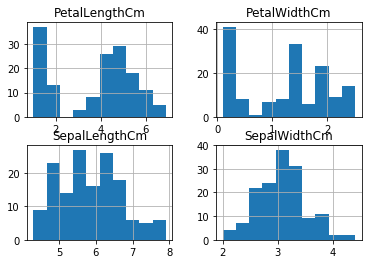

In [51]:
# ¿Cuál es el comportamiento de cada variable captura?
datos.hist()

In [45]:
# Presentación de la matriz de correlación
datos.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


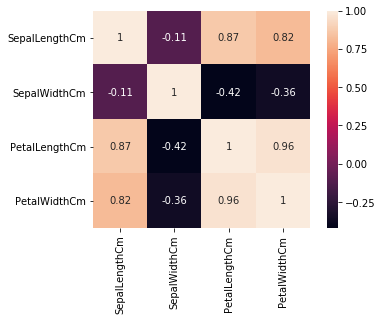

In [44]:
# La descripción gráfica de la matriz de correlación se presenta a continuación
sns.heatmap(datos.corr(), square=True, annot=True)

In [46]:
# Matriz de covarianza
datos.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414


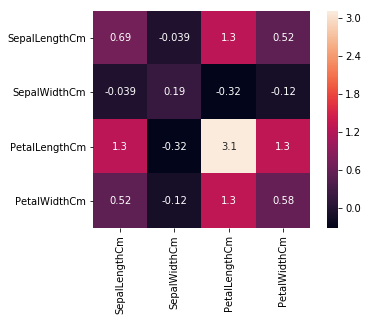

In [47]:
# Matriz de Varianza-Covarianza
sns.heatmap(datos.cov(), square=True, annot=True)